In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


We'll whip up a general-purpose PCA function

In [2]:
def PCA(data):
    mu = data.mean(axis=0)
    dx = data - mu
    cov = np.dot(dx.T, dx)/(len(data)-1)
    return np.linalg.eig(cov)

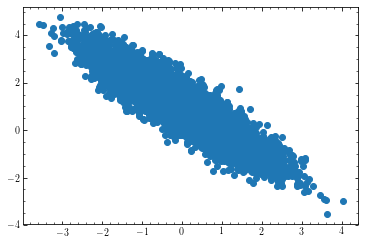

In [3]:
N = 10000
x = np.random.normal(size=(N,))

y = 1 - x + np.random.normal(size=(N,))*0.5 # set up a simple linear relation between x and y

plt.scatter(x,y)
plt.show()

In [4]:
eigs, eigv = PCA(np.c_[x,y])

for i in range(len(eigs)):
    print("Eigenvalue %d: %g"%(i+1, eigs[i]))
    print("Eigenvector %d: "%(i+1), eigv[:,i])

Eigenvalue 1: 0.117553
Eigenvector 1:  [-0.74905826 -0.66250414]
Eigenvalue 2: 2.17599
Eigenvector 2:  [ 0.66250414 -0.74905826]


We find that the eigenvector with the largest eigenvalue lies along the major axis of the ellipsoidal distribution.

# Camera Problem

We need to simulate the camera problem by generating the 3D coordinates of the moving object, and then transforming those coordinates to the frame of some different cameras

In [5]:
time = np.linspace(0,2*np.pi*10, 1000)
x = np.cos(time)
X = np.c_[x, np.zeros_like(x), np.zeros_like(x)]

A camera's coordinate frame is defined by 3 unit vectors: n1 pointing forward, n2 pointing left, and n3 pointing up. We shall assume that all cameras are oriented "right-side-up". Then, picking random pointing directions n1 is sufficient to fix their coordinate systems.

In [8]:
N_cameras = 10

# a simple trick for sampling random directions is to sample a 3D Gaussian, then normalize
n1 = np.random.normal(size=(N_cameras,3))
norm = (n1*n1).sum(axis=1)**0.5
n1 /= norm[:,np.newaxis]

# Then to get the side-pointing vector, the right-side-up constraint implies that the XY projection of n2 is perpendicular to n1
n2 = np.c_[n1[:,1], -n1[:,0], np.zeros(N_cameras)]
norm = (n2*n2).sum(axis=1)**0.5
n2 /= norm[:,np.newaxis]

# Then n3 is fixed to be n1 x n2
n3 = np.cross(n1, n2)



Now the coordinates of the oscillator are expressible in the coordinate systems of each camera by dotting them with their unit vectors

In [11]:
camera_coords = np.c_[ np.inner(X, n2), np.inner(X, n2)]
print(camera_coords.shape)
eigs, eigv = PCA(camera_coords)

for i in range(len(eigs)):
    print("Eigenvalue %d: %g"%(i+1, eigs[i]))
    #print("Eigenvector %d: "%(i+1), eigv[:,i].real)

(1000, 20)
Eigenvalue 1: -4.44089e-16
Eigenvalue 2: 3.50032
Eigenvalue 3: -3.69644e-16
Eigenvalue 4: 2.5966e-16
Eigenvalue 5: -2.2258e-16
Eigenvalue 6: 1.63783e-16
Eigenvalue 7: -1.60399e-16
Eigenvalue 8: 8.48262e-17
Eigenvalue 9: -6.54978e-17
Eigenvalue 10: -6.54978e-17
Eigenvalue 11: 3.01492e-17
Eigenvalue 12: 5.95622e-25
Eigenvalue 13: -5.95622e-25
Eigenvalue 14: -3.87304e-32
Eigenvalue 15: 2.87474e-33
Eigenvalue 16: 2.87474e-33
Eigenvalue 17: -1.48216e-32
Eigenvalue 18: -1.28011e-33
Eigenvalue 19: 1.73801e-33
Eigenvalue 20: 1.73801e-33


/home/mike/.conda/envs/idp/lib/python3.6/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


We see that there is just one eigenvalue that picks out the inherently 1D motion out of our 20-dimensional data space